# Working with HRDPS

In [16]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime
from cmocean import cm
from salishsea_tools import grid_tools, viz_tools

%matplotlib inline

In [3]:
# Load netCDF files from erddap
HRDPS_grid = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaAtmosphereGridV1')
NEMO_grid = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSnBathymetryV17-02')
NEMO_mask = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSn3DMeshMaskV17-02')
HRDPS = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1')

HRDPS mask function (you may find this useful)

In [4]:
# Build HRDPS mask (erddap variable names, must be changed if working with grid repo)
HRDPS_mask = grid_tools.build_GEM_mask(HRDPS_grid, NEMO_grid, NEMO_mask.tmask[0, 0, ...])

100%|██████████| 68096/68096 [11:19<00:00, 100.26it/s]


In [22]:
date = datetime(2019, 2, 1, 0, 0)

In [23]:
uv = []
for var in ['u_wind', 'v_wind']:
    uv.append(np.ma.masked_where(HRDPS_mask == 0, HRDPS[var].sel(time=date, method='nearest')))
U = np.sqrt(sum(var**2 for var in uv))

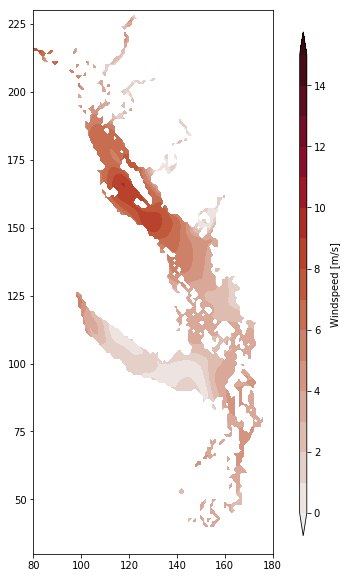

In [25]:
fig, ax = plt.subplots(figsize=(5, 10))
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
c = ax.contourf(U, levels=np.arange(16), cmap=cm.amp, extend='both')
ax.set_xlim([80, 180])
ax.set_ylim([30, 230])
viz_tools.set_aspect(ax)
fig.colorbar(c, cax=cax, label='Windspeed [m/s]')